In [2]:
# Setup

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy import integrate
from matplotlib.patches import Circle

from utils.plot.utils import plot_second_order_phase_portrait, plot_second_order_phase_portrait_polar

plt.rcParams["figure.figsize"] = (20, 20)

def saveFig(filename, chapter):
  plt.savefig(f"plots/chapter{chapter}/{filename}.png", facecolor="w")

# 8 - Bifurcations Revisited

## Hopf Bifurcation

### Supercritical

- Occurs when a stable spiral becomes an unstable spiral surrounded by a small (elliptical) limit cycle as a parameter $\mu$ is varied

Consider
$$
\begin{align*}
\dot{r} &= \mu r - r^3\\
\dot{\theta} &= \omega + br^2
\end{align*}
$$

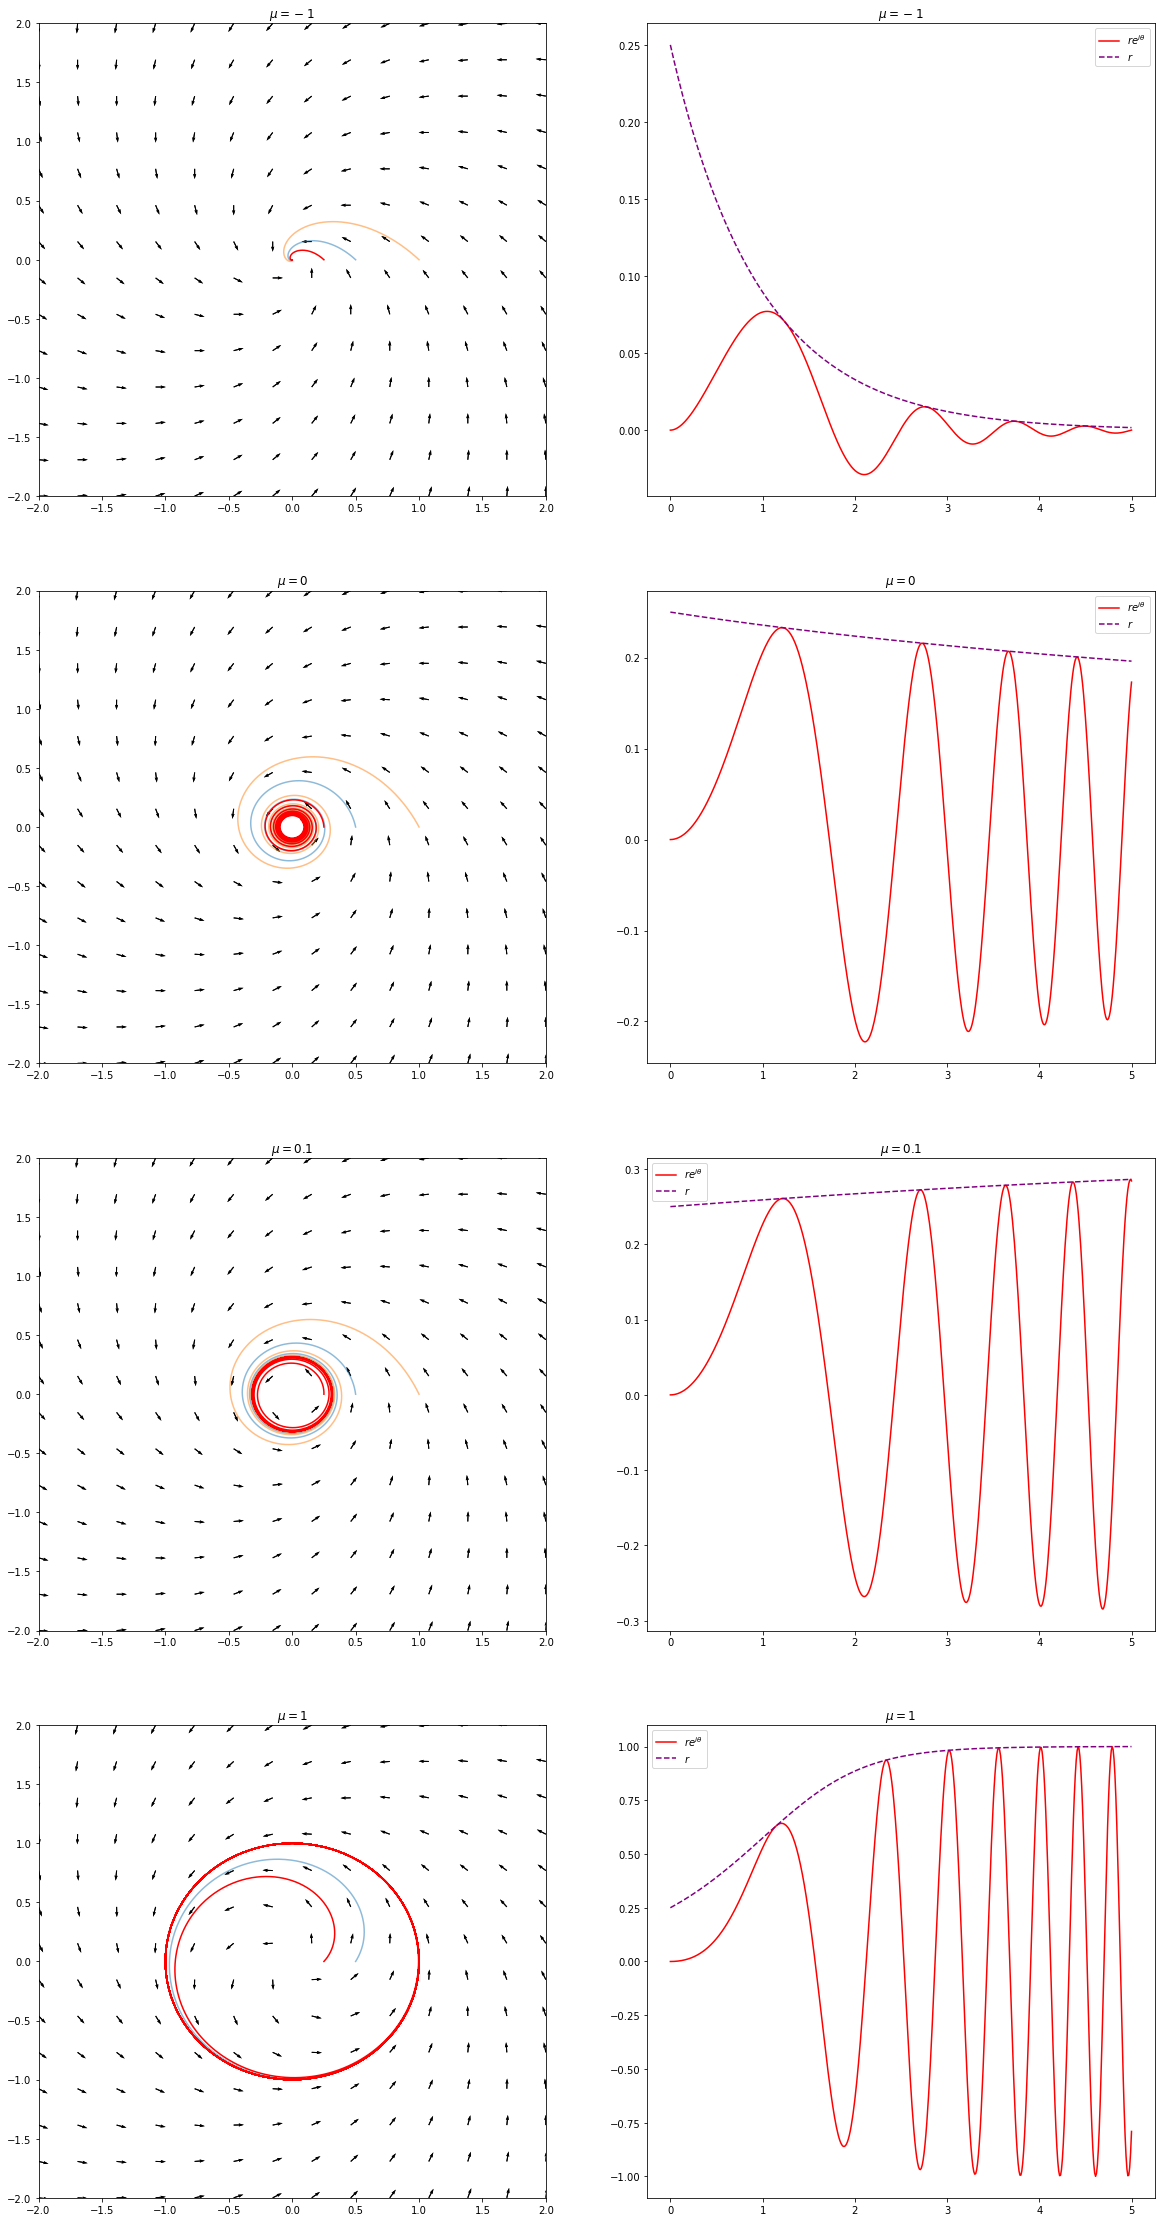

In [29]:
mu_values = [-1, 0, .1, 1]
omega = 1
b = 1

def sup_hopf(t, y):
  return [mu * y[0] - y[0]**3, omega + b * y[0]**2]

plt.rcParams["figure.figsize"] = (20, 40)

for idx, mu in enumerate(mu_values, start=1):
  plt.subplot(4, 2, idx * 2 - 1)
  plt.title(f"$\mu = {mu}$")
  plot_second_order_phase_portrait_polar(
    sup_hopf,
    [[.5, 0], [1, 0]],
    2,
    alpha=.5
  )
  plot_second_order_phase_portrait_polar(
    sup_hopf,
    [[.25, 0]],
    2,
    color="red"
  )

  plt.subplot(4, 2, idx * 2)
  plt.title(f"$\mu = {mu}$")
  sol = integrate.solve_ivp(sup_hopf, [0, 5], [0.25, 0], max_step=0.01)
  y = [sol.y[0][i] * np.sin(sol.y[1][i] * sol.t[i]) for i,j in enumerate(sol.t)]
  plt.plot(sol.t, y, color="red")
  plt.plot(sol.t, sol.y[0], color="purple", linestyle="dashed")
  plt.legend(["$re^{i\\theta}$", "$r$"])

plt.rcParams["figure.figsize"] = (20, 20)

### Subcritical

Consider
$$
\begin{align*}
\dot{r} &= \mu r + r^3 - r^5\\
\dot{\theta} &= \omega + br^2
\end{align*}
$$

- For $\mu < 0$ there is a fixed point at the origin and a stable limit cycle, between them is an unstable limit cycle
- For $\mu > 0$ the unstable cycle disappears (it closes in on the fixed point as $\mu$ increases), and the origin becomes unstable
  - Means that points near the origin are stable until $\mu$ exceeds a certain value, they then become unstable and move towards the stable limit cycle
  - i.e. a system with almost no oscillations will switch to having large amplitude oscillations when $\mu$ exceeds a threshold
- Shows hysteresis as changing $\mu$ back to being negative won't cause the system to go back to small amplitude oscillations

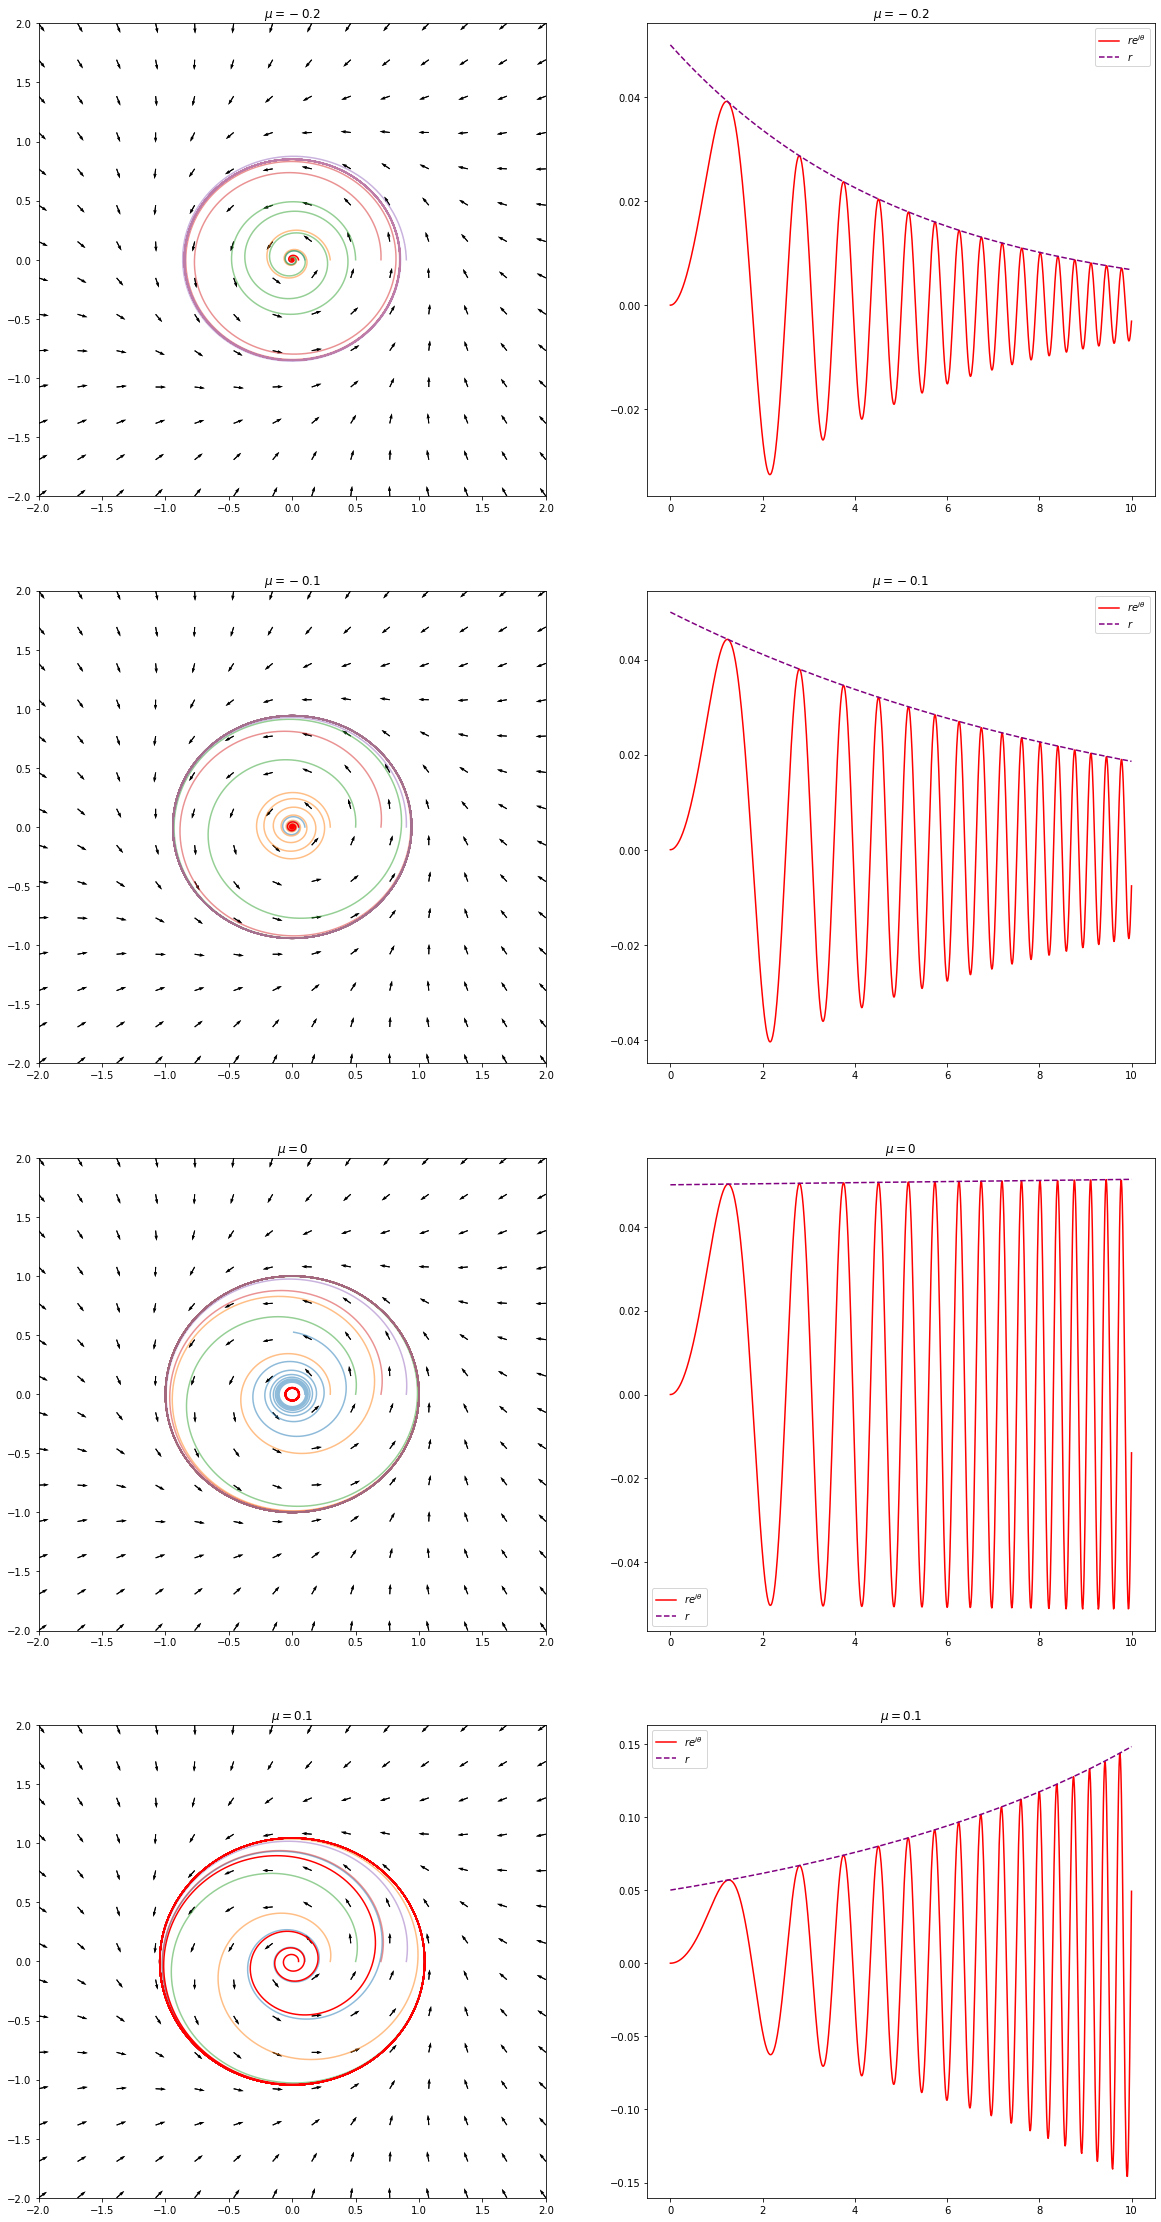

In [2]:
mu_values = [-.2, -.1, 0, .1]
omega = 1
b = 1

def sub_hopf(t, y):
  return [mu * y[0] + y[0]**3 - y[0]**5, omega + b * y[0]**2]

plt.rcParams["figure.figsize"] = (20, 40)

for idx, mu in enumerate(mu_values, start=1):
  plt.subplot(4, 2, idx * 2 - 1)
  plt.title(f"$\mu = {mu}$")
  plot_second_order_phase_portrait_polar(
    sub_hopf,
    [[.1, 0], [.3, 0], [.5, 0], [.7, 0], [.9, 0]],
    2,
    alpha=.5
  )
  plot_second_order_phase_portrait_polar(
    sub_hopf,
    [[.05, 0]],
    2,
    color="red"
  )
  plt.subplot(4, 2, idx * 2)
  plt.title(f"$\mu = {mu}$")
  sol = integrate.solve_ivp(sub_hopf, [0, 10], [.05, 0], max_step=0.01)
  y = [sol.y[0][i] * np.sin(sol.y[1][i] * sol.t[i]) for i,j in enumerate(sol.t)]
  plt.plot(sol.t, y, color="red")
  plt.plot(sol.t, sol.y[0], color="purple", linestyle="dashed")
  plt.legend(["$re^{i\\theta}$", "$r$"])

plt.rcParams["figure.figsize"] = (20, 20)

## Global Bifurcations

For the above system, when $\mu < \mu_c < 0$ (in this case $\mu_c = -0.25$) there is a **saddle-node bifurcation of cycles** which is the equivalent of a saddle-node bifurcation except it happens for a cycle (i.e. a saddle-node bifurcation in the radial direction at $r \neq 0$). This is a type of **global bifurcation** (a bifurcation which involves a large region of the phase plane instead of just near a fixed point).

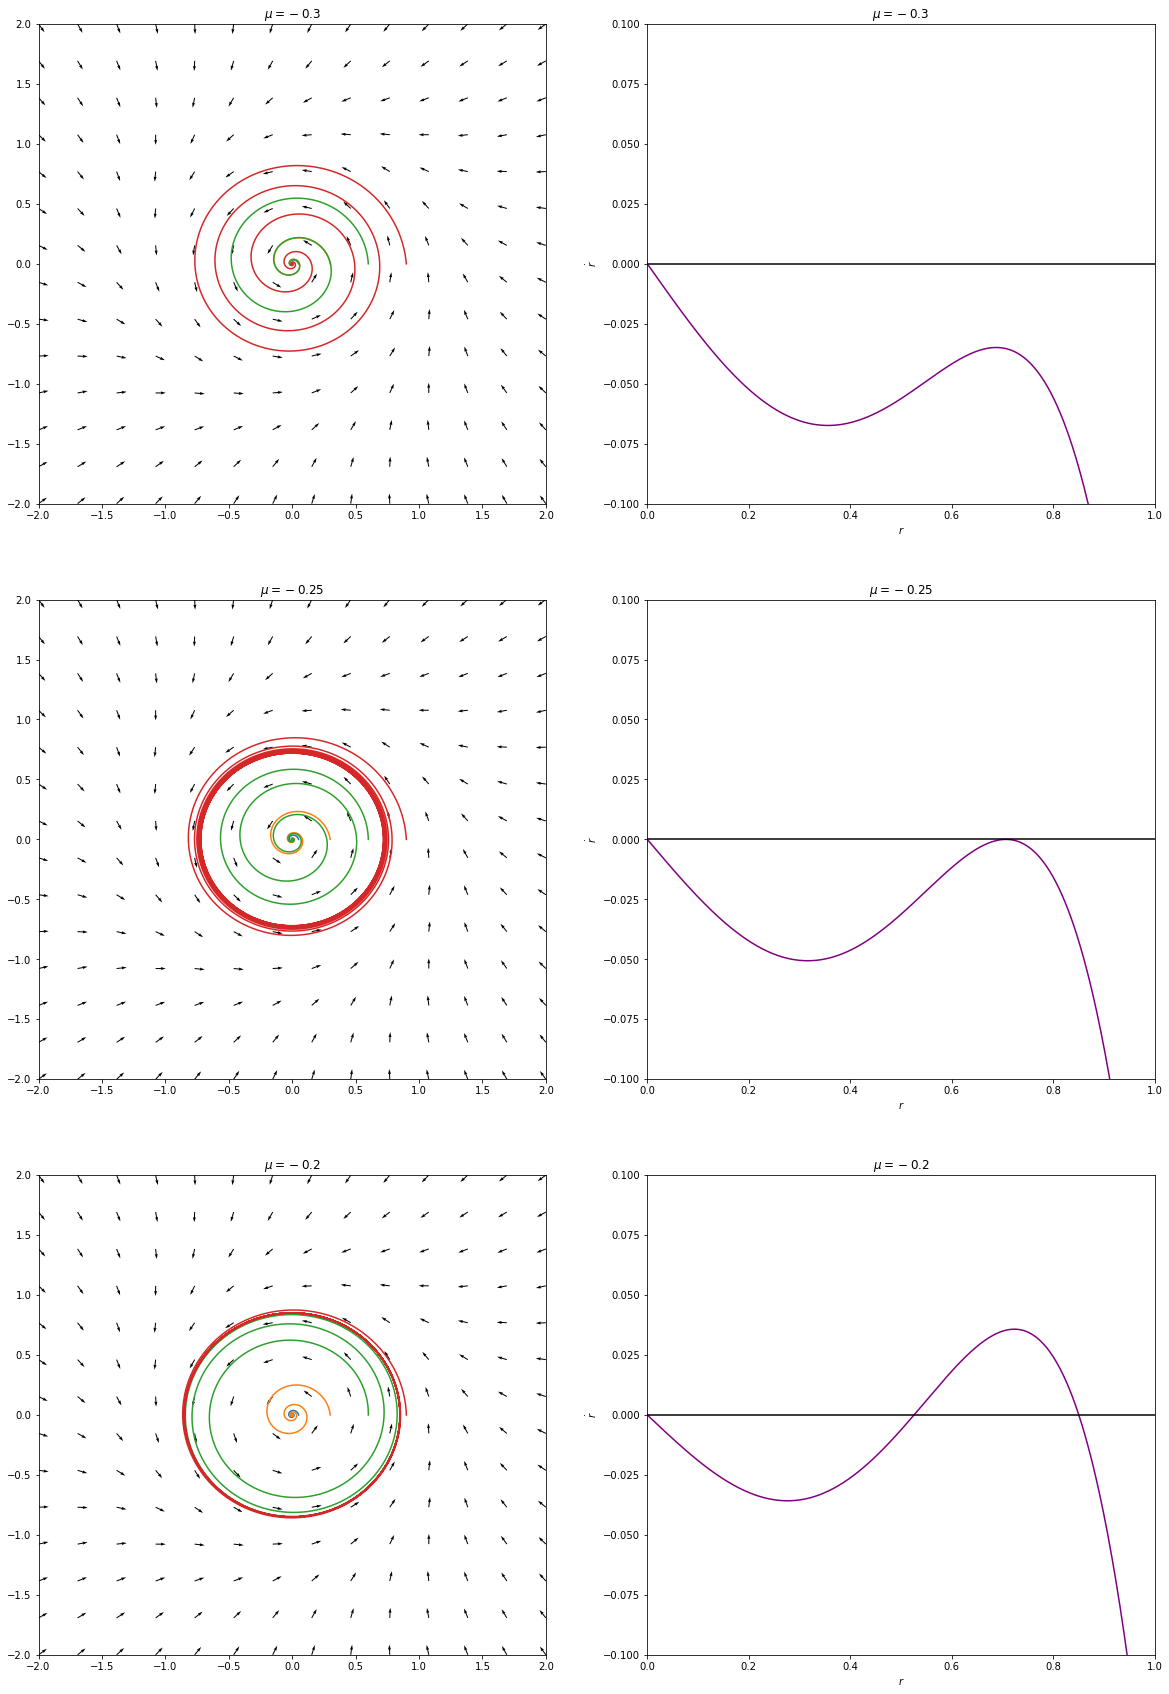

In [18]:
plt.rcParams["figure.figsize"] = (20, 30)

for idx, mu in enumerate([-.3, -.25, -.2], start=1):
  plt.subplot(3, 2, idx * 2 - 1)
  plt.title(f"$\mu = {mu}$")
  plot_second_order_phase_portrait_polar(
    sub_hopf,
    [[.05, 0], [.3, 0], [.6, 0], [.9, 0]],
    2,
  )
  plt.subplot(3, 2, idx * 2)
  plt.title(f"$\mu = {mu}$")
  r = np.linspace(0, 1, 500)
  r_dot = mu * r + r**3 - r**5
  plt.plot(r, r_dot, color="purple")
  plt.xlabel("$r$")
  plt.ylabel("$\dot{r}$")
  plt.ylim([-.1, .1])
  plt.xlim([0, 1])
  plt.axhline(color="black")

plt.rcParams["figure.figsize"] = (20, 20)

An **infinite period** bifurcation occurs when a finite period oscillation has a bottle-neck develop that turns into a fixed point for a certain value of the parameter, this then causes the period of oscillation to become infinite

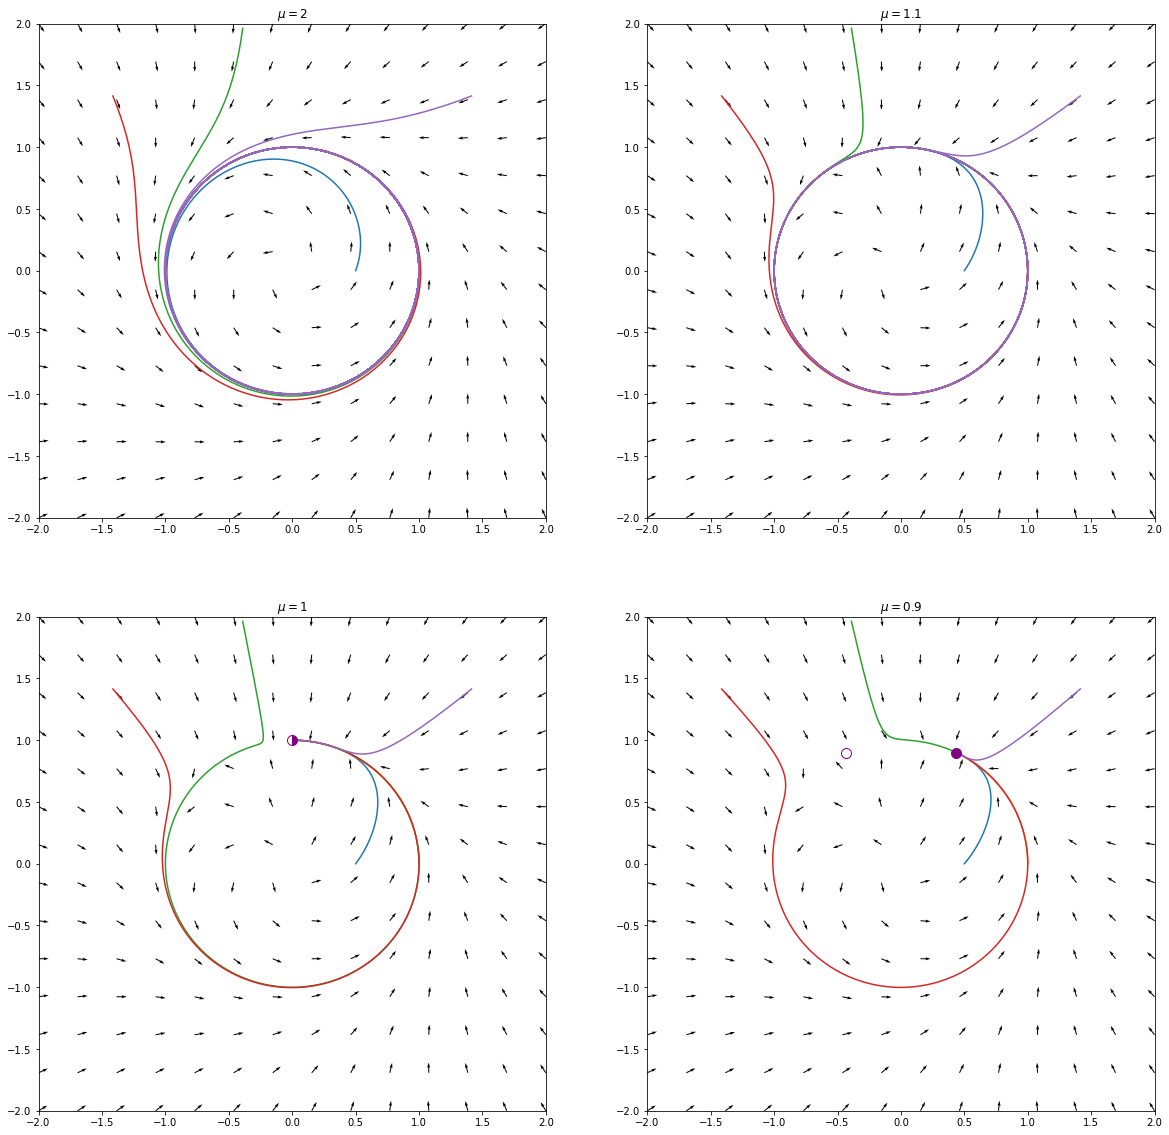

In [2]:
from utils.plot.utils import draw_circle

for idx, mu in enumerate([2, 1.1, 1, .9], start=1):
  plt.subplot(2, 2, idx)
  plt.title(f"$\mu = {mu}$")
  plot_second_order_phase_portrait_polar(
    lambda t, y: [y[0] * (1 - y[0] ** 2), mu - np.sin(y[1])],
    [
      [.5, 0],
      [1, 0],
      [2, 9 * np.pi / 16],
      [2, 3 * np.pi / 4],
      [2, np.pi / 4],
    ],
    2
  )
  if idx == 3:
    draw_circle([np.cos(np.arcsin(mu)), mu], 10, type="right")
  if idx == 4:
    draw_circle([np.cos(np.arcsin(mu)), mu], 10)
    draw_circle([np.cos(np.pi - np.arcsin(mu)), mu], 10, type="empty")

## Coupled Oscillators

### Uncoupled Case

$$
\begin{align*}
\dot{\theta} &= \omega_1 \\
\dot{\phi} &= \omega_2
\end{align*}
$$
With $\omega_1,\omega_2 \in \mathbb{R}$. If $\omega_1/\omega_2 = p/q$ with $p,q \in \mathbb{Z}$ then the after the second had undergone $q$ cycles the first will have undergone $p$ cycles, hence the system has a closed orbit. When plotted on a torus it will form a **$p:q$ torus knot** (in the case of $2:3$ it is a **trefoil knot**). Following the trajectory of $\phi$ it will have $\Delta\phi = 2\pi$ when $\Delta\theta = 2p\pi / q$ so when $\phi$ undergoes a full rotation, $\theta$ will have undergone $p/q$ of a full rotation.

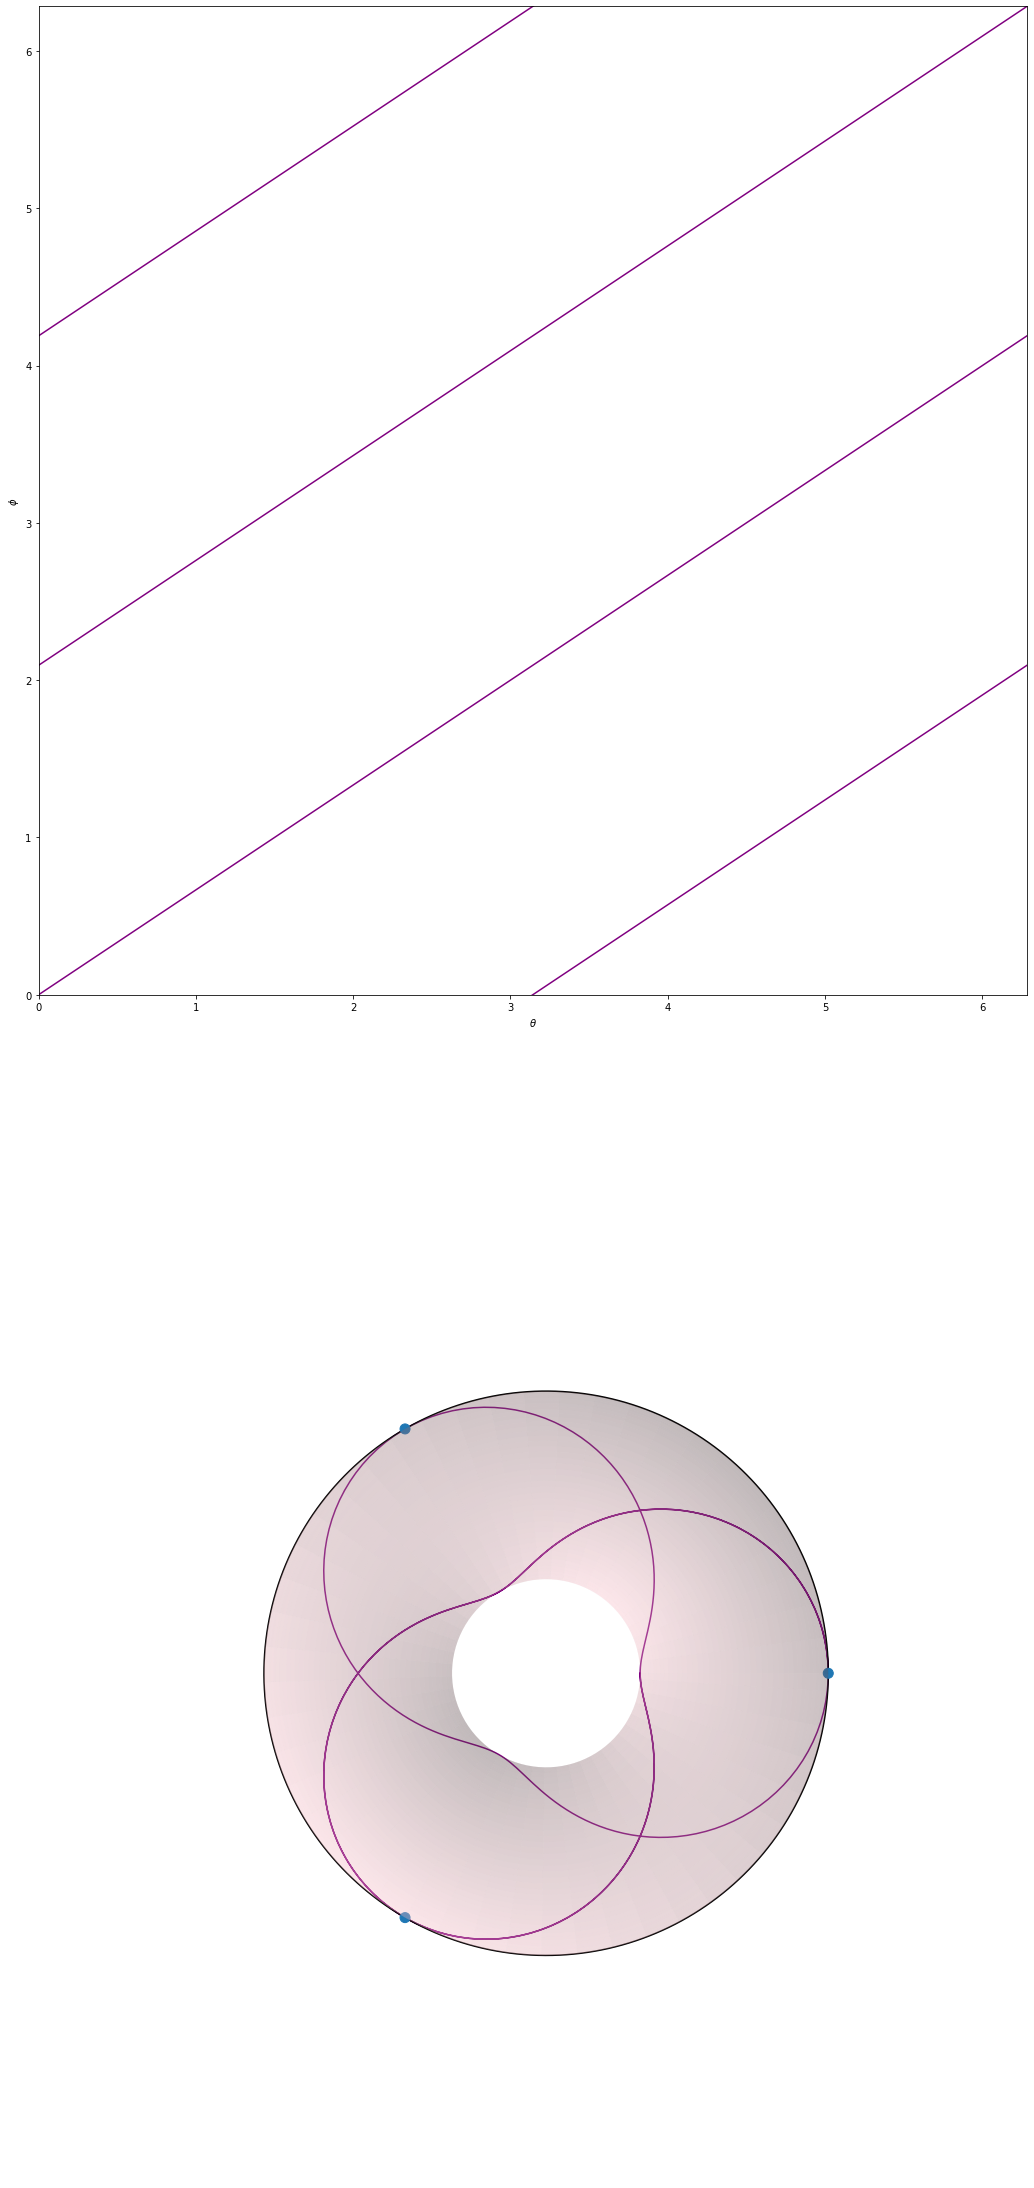

In [304]:
r_1 = 1
r_2 = 0.5
R = r_1 + r_2

# %matplotlib widget
%matplotlib inline

fig = plt.figure(figsize=(20, 40))

phi = np.linspace(0, 6 * np.pi, 500)
theta = phi * 3/2

ax = fig.add_subplot(2, 1, 1)
ax.plot(theta, phi, theta, phi + 2 * np.pi / 3, theta, phi + 4 * np.pi / 3, theta, phi - 2 * np.pi / 3, color="purple")
ax.set_xlim([0, 2 * np.pi])
ax.set_ylim([0, 2 * np.pi])
ax.set_aspect(1)
ax.set_xlabel("$\\theta$")
ax.set_ylabel("$\\phi$")

ax = fig.add_subplot(2, 1, 2, projection="3d")
ax.set_proj_type("ortho")

ax.plot(np.cos(phi) * (r_1 + r_2 * np.cos(theta)), np.sin(phi) * (r_1 + r_2 * np.cos(theta)), r_2 * np.sin(theta), color="purple")
ax.view_init(elev=90, azim=270)

u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, 2*np.pi, 100)
u, v = np.meshgrid(u, v)
x = np.cos(u) * (r_1 + r_2 * np.cos(v))
y = np.sin(u) * (r_1 + r_2 * np.cos(v))
z = r_2 * np.sin(v)
ax.plot_surface(x, y, z, alpha=.2, color="pink")

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_box_aspect((1,1,1))
ax.axis("off")

theta = np.linspace(0, 2 * np.pi, 500)
ax.plot(R * np.cos(theta), R * np.sin(theta), color="black")

thetas = [0, 2 * np.pi / 3, 4 * np.pi / 3]
ax.scatter(R * np.cos(thetas), R * np.sin(thetas), np.zeros_like(thetas), s=100)

plt.show()

## Exercises

### 8.2.5
$$
\begin{align*}
\dot{x} &= y + \mu x \\
\dot{y} &= -x + \mu y - x^2 y
\end{align*}
$$

Supercritical Hopf bifurcation

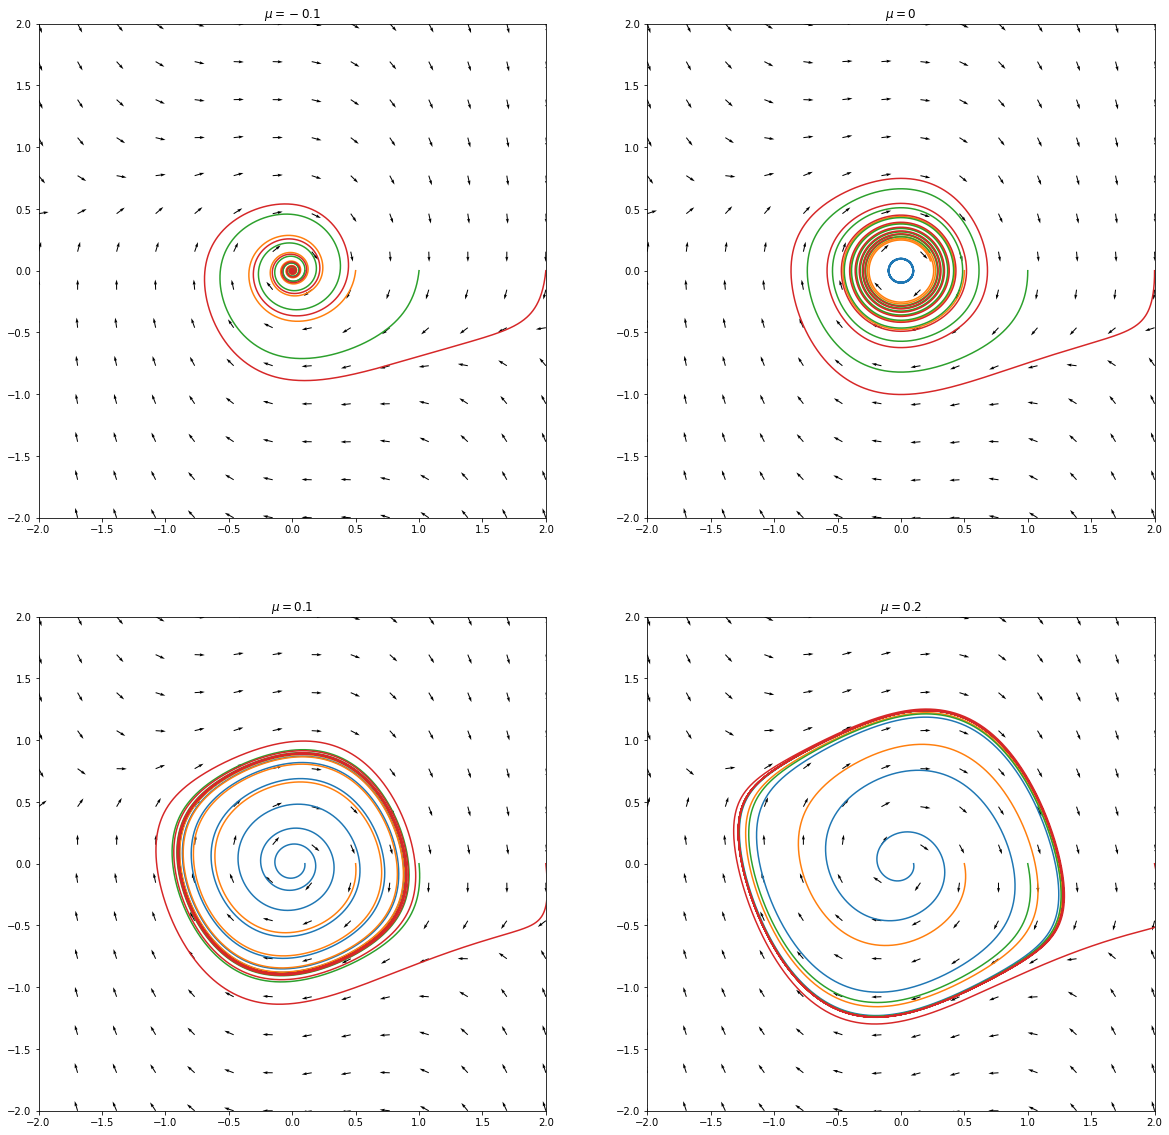

In [42]:
for idx, mu in enumerate([-.1, 0, .1, .2], start=1):
  plt.subplot(2, 2, idx)
  plt.title(f"$\mu = {mu}$")
  plot_second_order_phase_portrait(
    lambda t, y: [y[1] + mu * y[0], -y[0] + mu * y[1] - (y[0] ** 2) * y[1]],
    [
      [.1, 0],
      [.5, 0],
      [1, 0],
      [2, 0],
    ],
    [[-2, 2], [-2, 2]],
    solver_options={
      "method": "Radau",
    }
  )

### 8.2.6
$$
\begin{align*}
\dot{x} &= \mu x + y - x^3 \\
\dot{y} &= -x + \mu y - 2y^3
\end{align*}
$$

Supercritical Hopf bifurcation

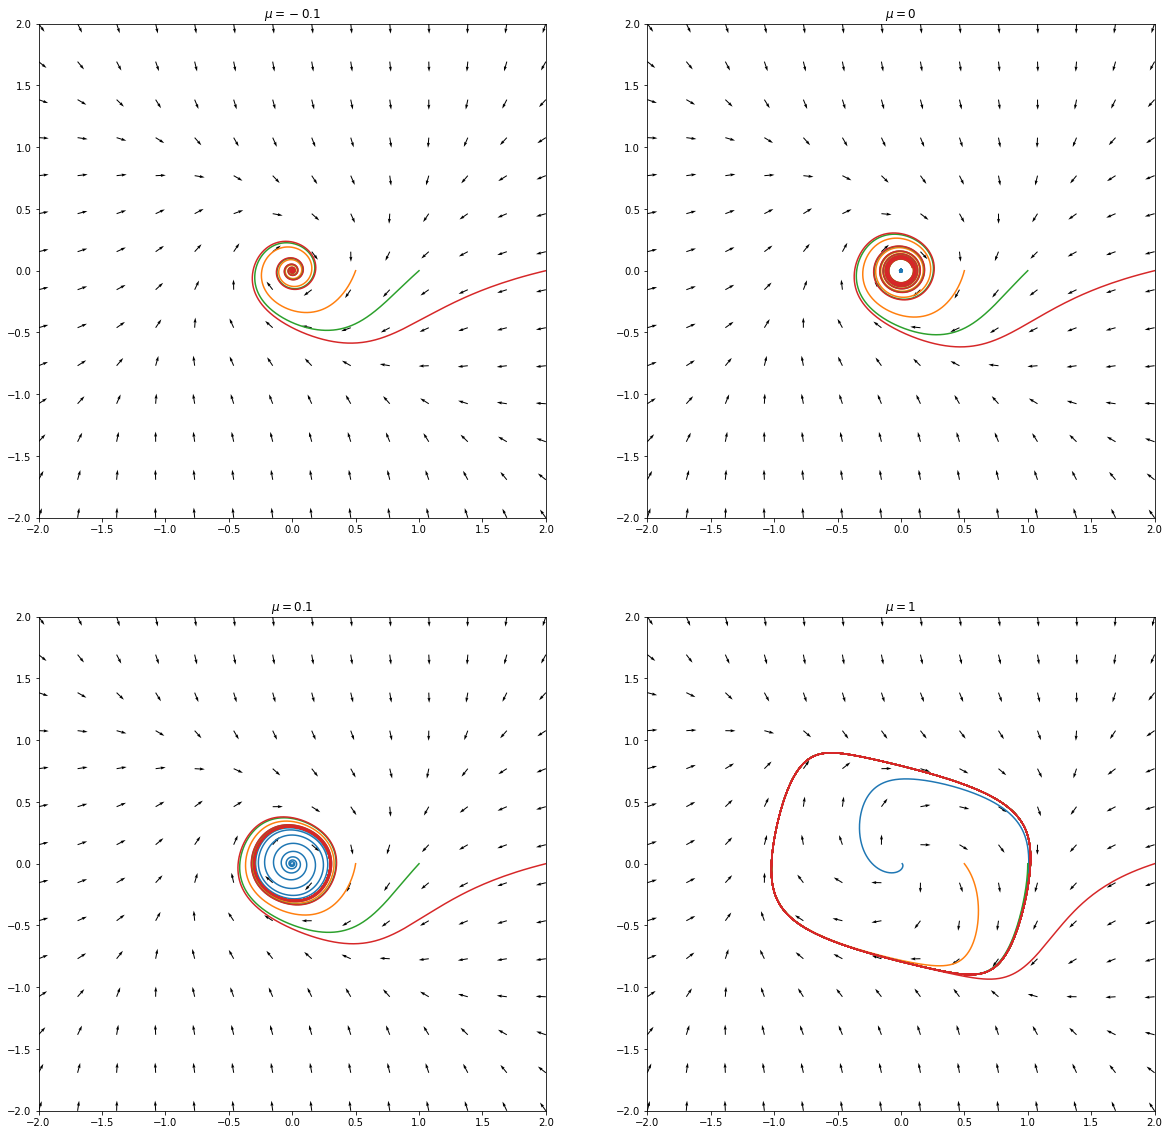

In [44]:
for idx, mu in enumerate([-.1, 0, .1, 1], start=1):
  plt.subplot(2, 2, idx)
  plt.title(f"$\mu = {mu}$")
  plot_second_order_phase_portrait(
    lambda t, y: [mu * y[0] + y[1] - y[0]**3, -y[0] + mu * y[1] - 2 * y[1]**3],
    [
      [.01, 0],
      [.5, 0],
      [1, 0],
      [2, 0],
    ],
    [[-2, 2], [-2, 2]],
    solver_options={
      "method": "Radau",
    }
  )

### 8.2.7
$$
\begin{align*}
\dot{x} &= \mu x + y - x^2 \\
\dot{y} &= -x + \mu y - 2x^2
\end{align*}
$$

Degenerate Hopf bifurcation

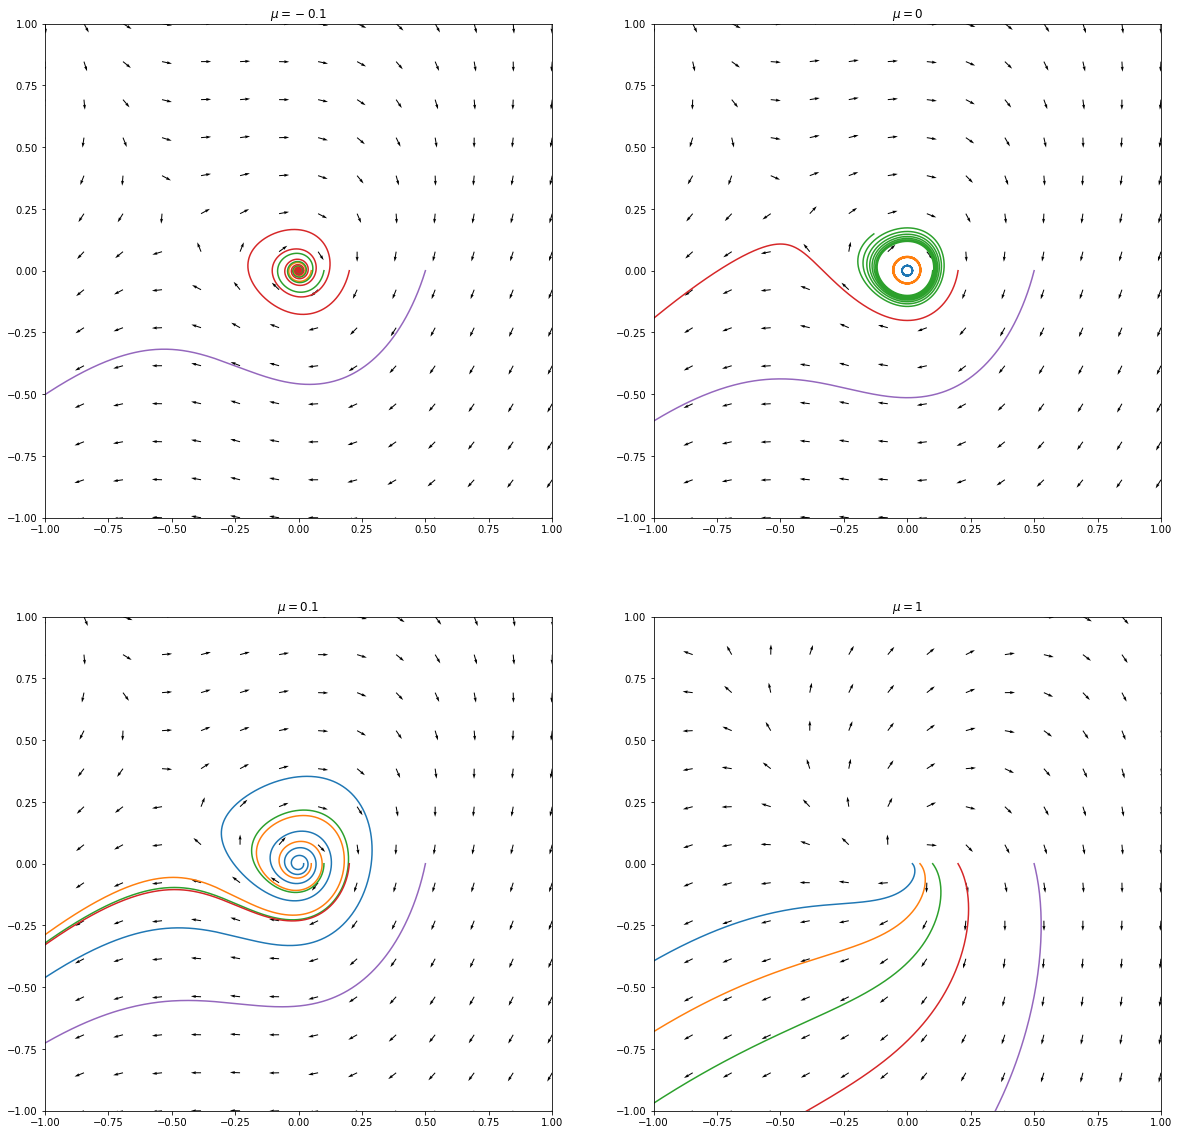

In [6]:
for idx, mu in enumerate([-.1, 0, .1, 1], start=1):
  plt.subplot(2, 2, idx)
  plt.title(f"$\mu = {mu}$")
  plot_second_order_phase_portrait(
    lambda t, y: [mu * y[0] + y[1] - y[0]**2, -y[0] + mu * y[1] - 2 * y[0]**2],
    [
      [.02, 0],
      [.05, 0],
      [.1, 0],
      [.2, 0],
      [.5, 0],
    ],
    [[-1, 1], [-1, 1]],
    solver_options={
      "method": "Radau",
    }
  )

### 8.4.1
$$
\begin{align*}
\dot{r} &= r(1 - r^2) \\
\dot{\theta} &= \mu - \sin\theta
\end{align*}
$$
Where $\mu$ is slightly greater than one. This is close to an infinite period bifurcation.

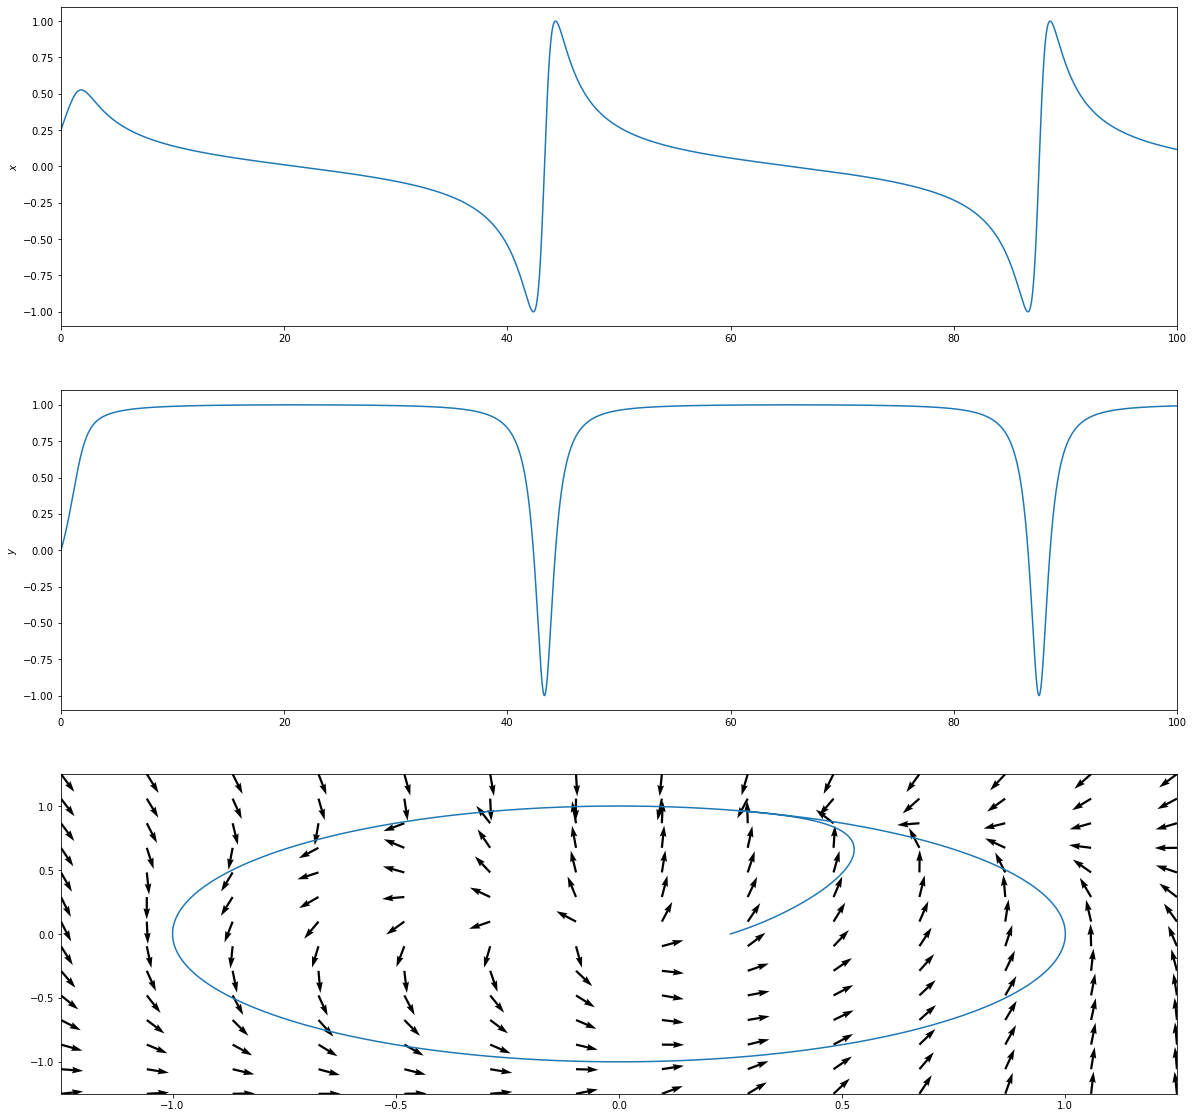

In [23]:
mu = 1.01
sol = integrate.solve_ivp(lambda t, y: [y[0] * (1 - y[0] ** 2), mu - np.sin(y[1])], [0, 100], [0.25, 0], max_step=0.01)
plt.subplot(3, 1, 1)
plt.ylabel("$x$")
plt.xlim([0, 100])
plt.plot(sol.t, sol.y[0] * np.cos(sol.y[1]))
plt.subplot(3, 1, 2)
plt.ylabel("$y$")
plt.xlim([0, 100])
plt.plot(sol.t, sol.y[0] * np.sin(sol.y[1]))

plt.subplot(3, 1, 3)
plot_second_order_phase_portrait_polar(lambda t, y: [y[0] * (1 - y[0] ** 2), mu - np.sin(y[1])], [[0.25, 0]], 1.25)

### 8.4.4
$$
\ddot{\theta} + (1 - \mu\cos\theta)\dot{\theta} + \sin\theta = 0
$$
$\mu \geq 0$. As a 2D system:
$$
\begin{align*}
\dot{\theta} &= \omega \\
\dot{\omega} &= (\mu\cos\theta - 1)\omega - \sin\theta
\end{align*}
$$

Supercritical Hopf bifurcation when $\mu = 1$, the stable limit cycle breaks down at $\mu \approx 3.725$ in a homoclinic bifurcation

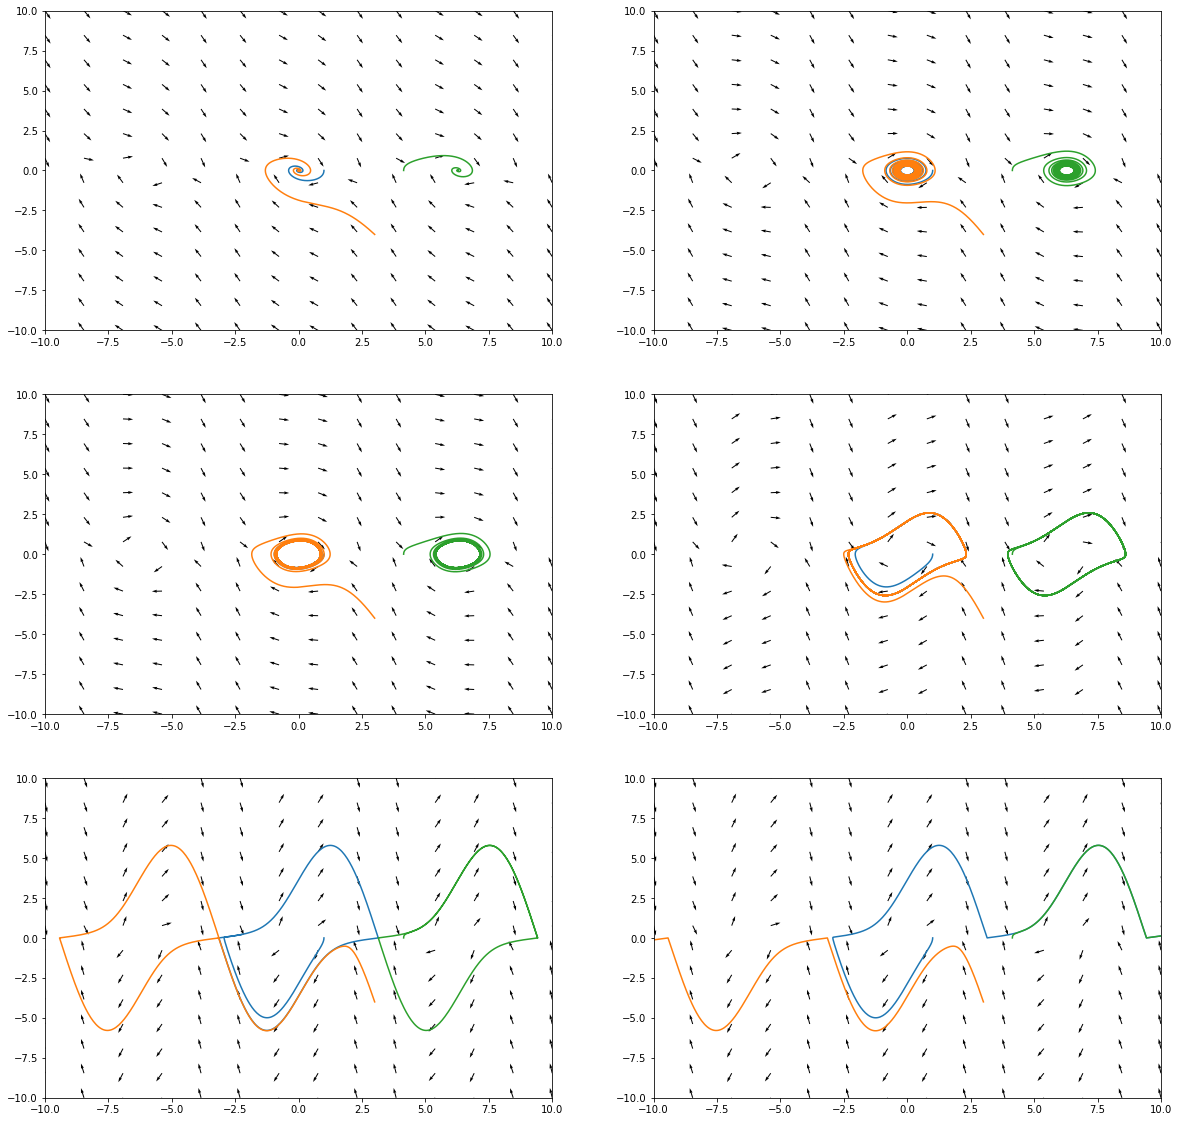

In [84]:
for idx, mu in enumerate([.5, 1, 1.1, 2, 3.724, 3.726], start=1):
  plt.subplot(3, 2, idx)
  plot_second_order_phase_portrait(
    lambda t, y: [y[1], (mu * np.cos(y[0]) - 1) * y[1] - np.sin(y[0])],
    [
      # [0, 0],
      # [.1, 0],
      # [.5, 0],
      [1, 0],
      [3, -4],
      [np.pi + 1, 0]
    ],
    [[-10, 10], [-10, 10]],
  )

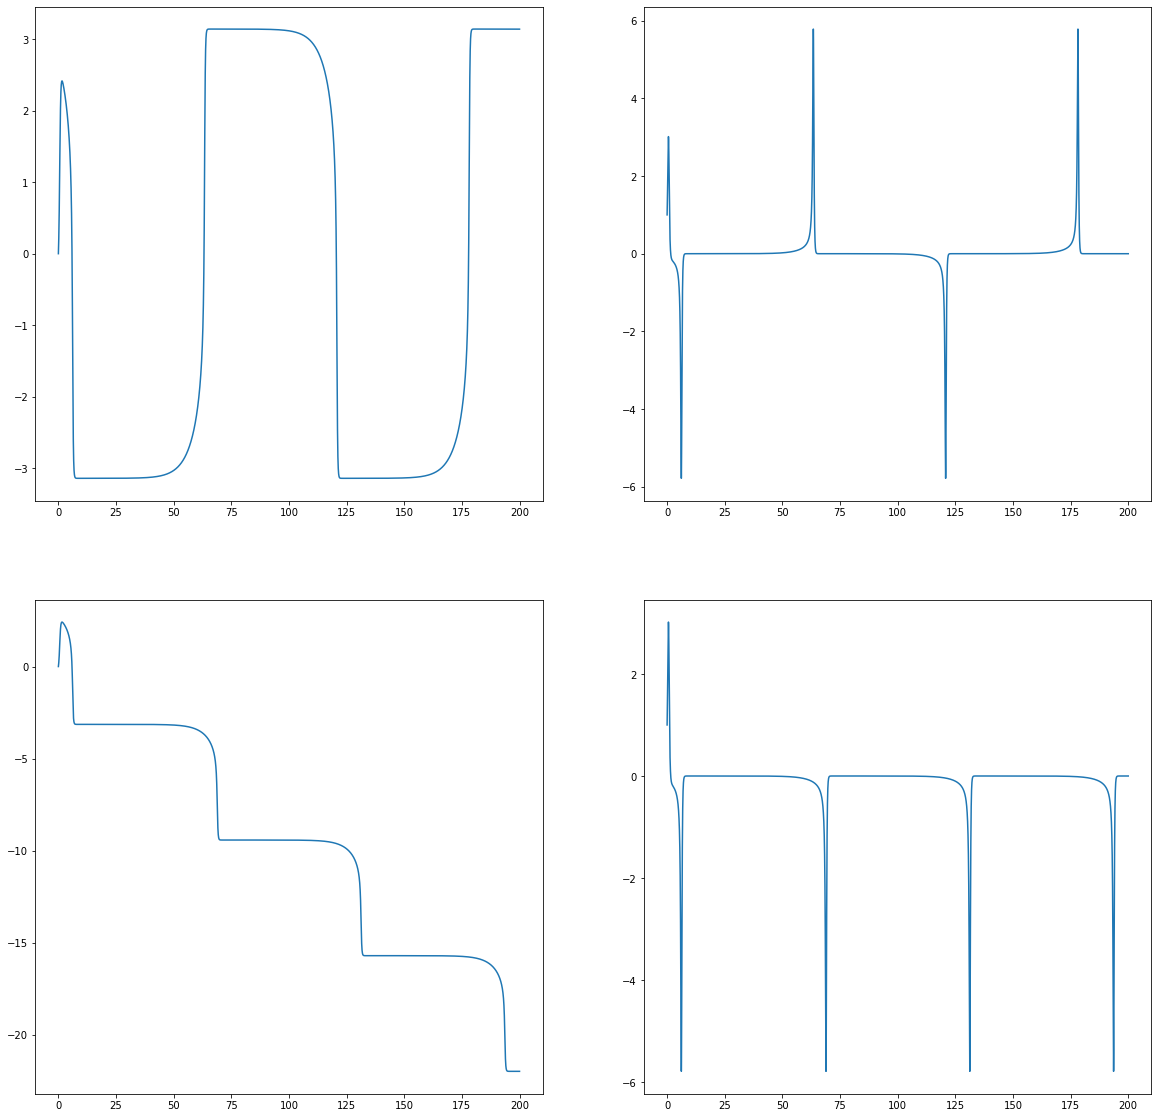

In [85]:
mu = 3.7248
sol = integrate.solve_ivp(lambda t, y: [y[1], (mu * np.cos(y[0]) - 1) * y[1] - np.sin(y[0])], [0, 200], [0, 1], max_step=0.01)
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0])
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1])
mu = 3.7249
sol = integrate.solve_ivp(lambda t, y: [y[1], (mu * np.cos(y[0]) - 1) * y[1] - np.sin(y[0])], [0, 200], [0, 1], max_step=0.01)
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[0])
plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[1])
plt.show()

### 8.6.5 - Lissajous figures
$$
\begin{align*}
x(t) &= \sin t \\
y(t) &= \sin\omega t
\end{align*}
$$

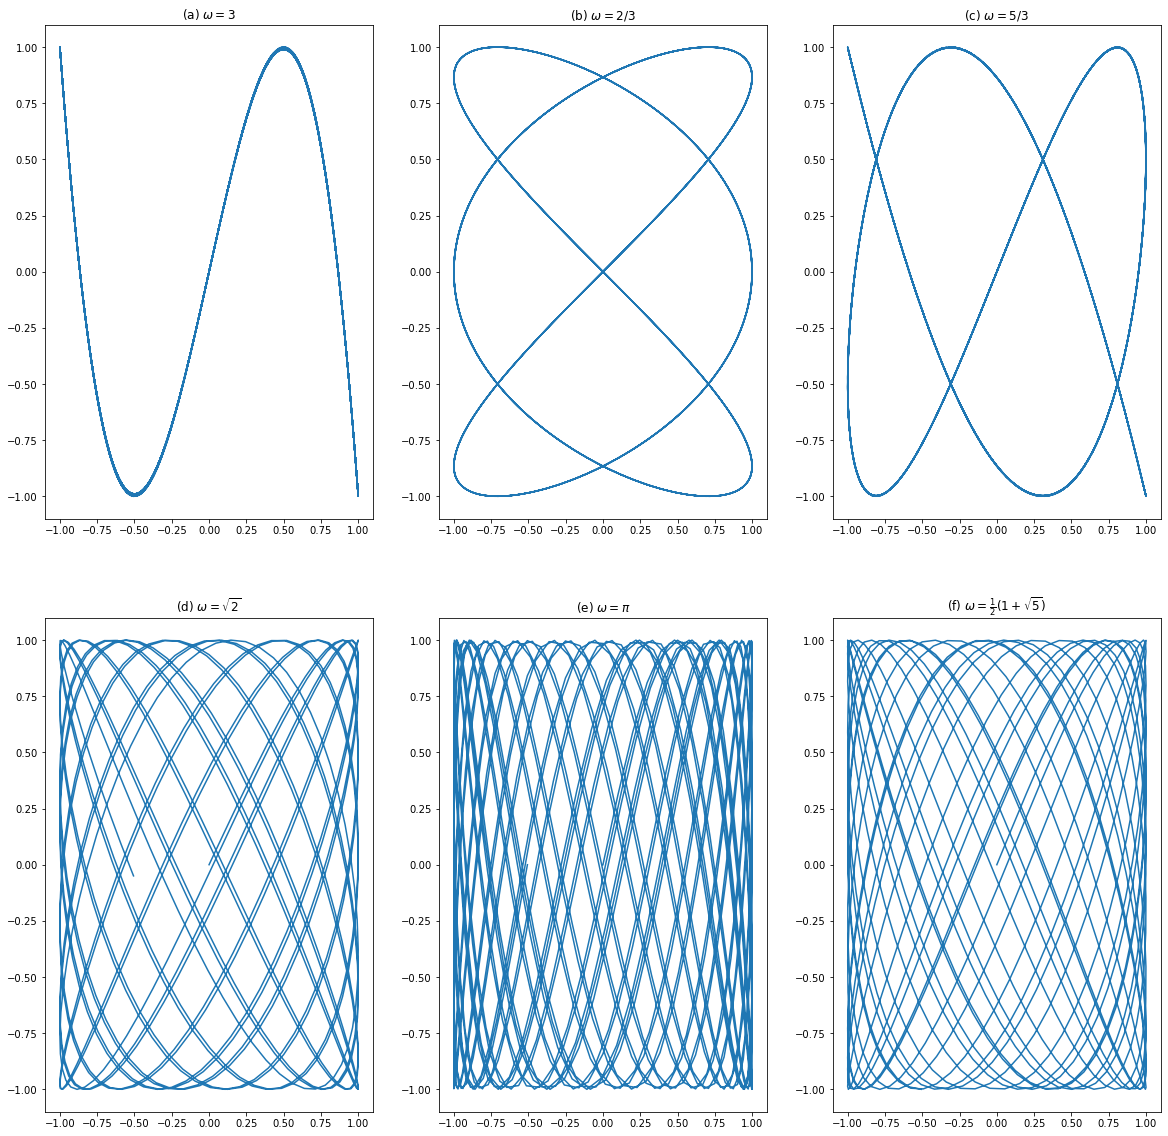

In [108]:
for idx, (omega, omega_str) in enumerate([(3, "3"), (2/3, "2/3"), (5/3, "5/3"), (np.sqrt(2), "\sqrt{2}"), (np.pi, "\pi"), ((1 + np.sqrt(5)) / 2, "\\frac{1}{2}(1 + \sqrt{5})")], start=1):
  plt.subplot(2, 3, idx)
  plt.title(f"({chr(96 + idx)}) $\omega = {omega_str}$")
  t = np.linspace(0, 100, 1000)
  plt.plot(np.sin(t), np.sin(omega * t))

### 8.6.8

$$
\begin{align*}
m\ddot{r} &= \frac{h^2}{mr^3} - k \\
\dot{\theta} &= \frac{h}{mr^2}
\end{align*}
$$

$h > 0$, $k > 0$

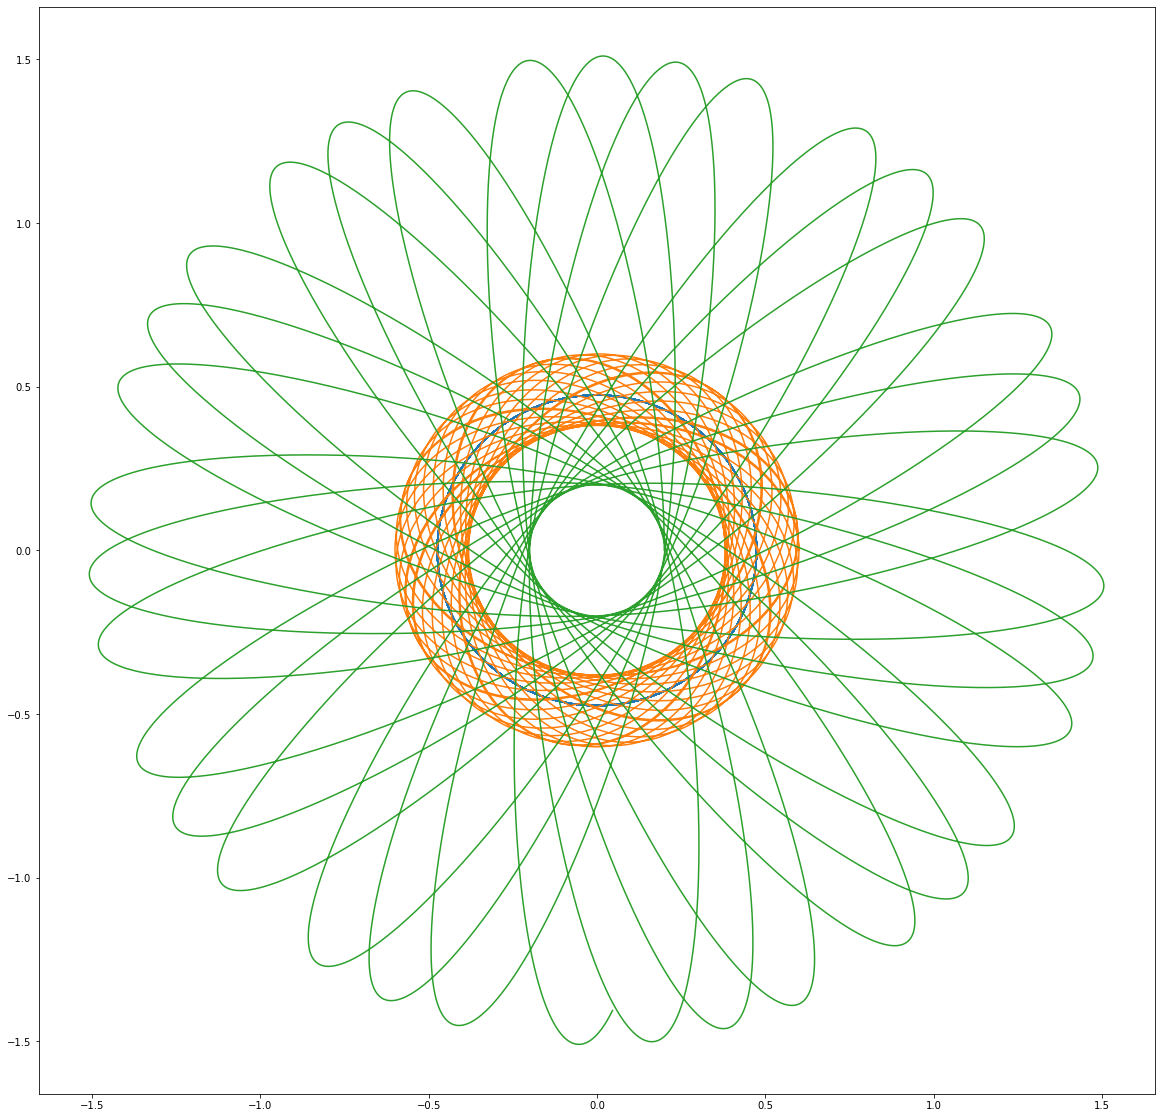

In [130]:
h = 4
k = 15
m = 10

for r_init in [np.cbrt(h ** 2 / (m * k)), .6, .2]:
  sol = integrate.solve_ivp(
    # [r, theta, dr/dt]
    lambda t, y: [y[2], h/(m * y[0]**2), h**2 / (m ** 2 * y[0] ** 3) - k/m],
    [0, 100],
    [r_init, 0, 0],
    max_step=0.01
  )

  plt.plot(sol.y[0] * np.cos(sol.y[1]), sol.y[0] * np.sin(sol.y[1]))

plt.show()

### 8.

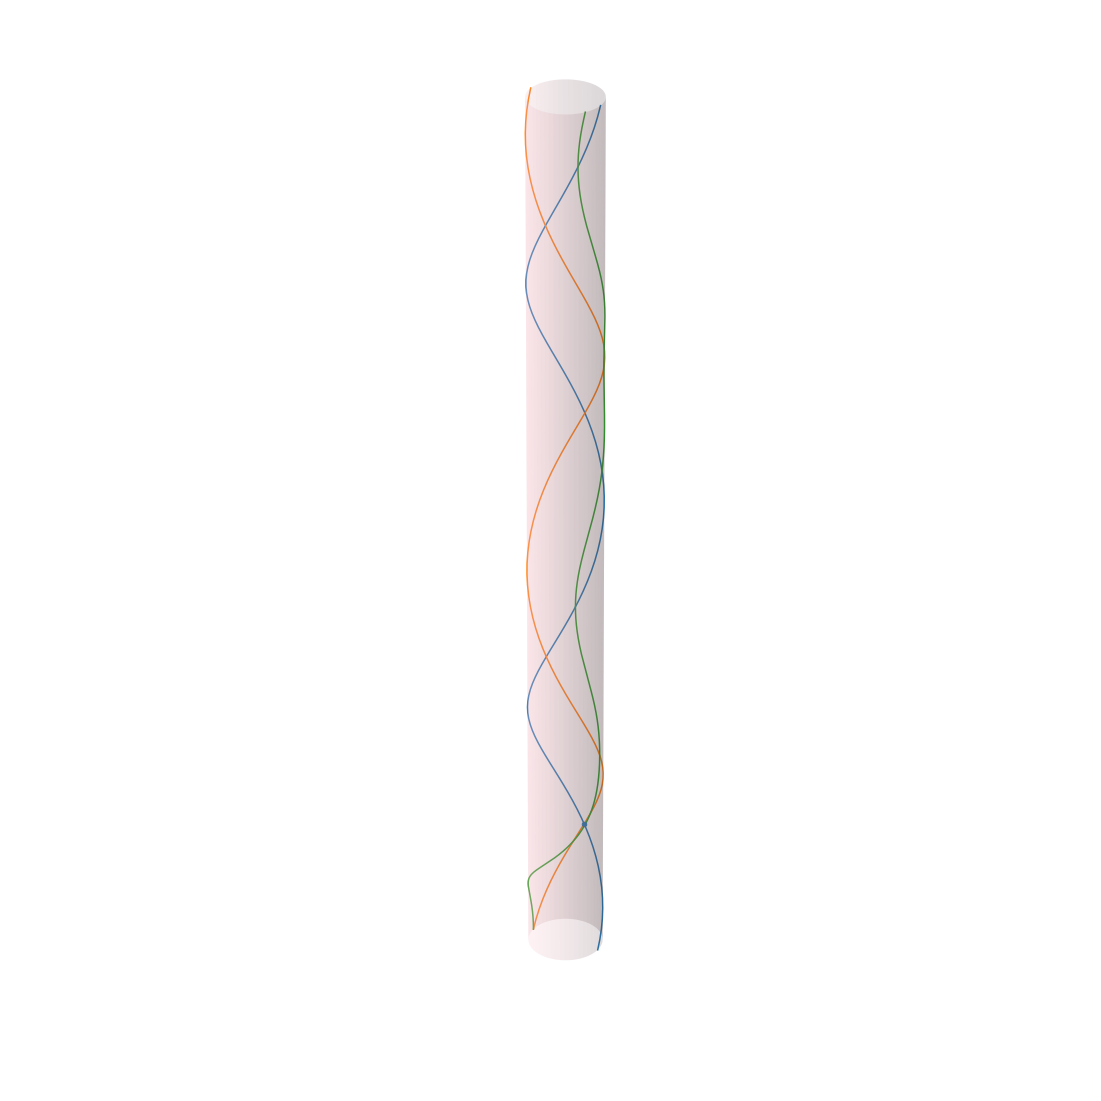

In [45]:
# %matplotlib widget
%matplotlib inline

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection="3d")

t_range = [0, 4 * np.pi]
theta = np.linspace(0, 2*np.pi, 100)
t = np.linspace(t_range[0], t_range[1], 2)
theta, t = np.meshgrid(theta, t)
x = np.cos(theta)
y = np.sin(theta)
z = t
ax.plot_surface(x, y, z, alpha=.2, color="pink")

ax.set_box_aspect((1, 1, t_range[1]))
ax.axis("off")

t = np.linspace(t_range[0], t_range[1], 100)
ax.plot(np.cos(t), np.sin(t), t)
ax.plot(np.cos(np.pi - t), np.sin(np.pi - t), t)

sol = integrate.solve_ivp(lambda t, y: [np.sin(t) - np.sin(y[0])], t_range, [-np.pi, 0], max_step=0.01)
ax.plot(np.cos(sol.y[0]), np.sin(sol.y[0]), sol.t)

ax.scatter3D([0], [1], [np.pi / 2])

plt.show()